In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
# how many customers are left the bank and how many are still existed
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [3]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
 df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


one hot encoding to convert the categorical data to numerical data


In [7]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


1. Function Usage
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


columns → choose categorical columns to encode.

drop_first=True → avoids dummy variable trap (creates n-1 columns).

dtype=int → ensures 0/1 instead of True/False.

2. Gender (Binary Category)

Categories: Male, Female.

With drop_first=True: Pandas drops the first category (alphabetical order → Female).

Only one column (Gender_Male) is created.

1 → Male

0 → Female

✅ Binary variable needs only 1 dummy.

3. Geography (Multi-Class Category)

Categories: France, Germany, Spain.

Without dropping → 3 columns (France, Germany, Spain).

With drop_first=True: Pandas drops the first category alphabetically (France).

Keeps 2 columns: Geography_Germany, Geography_Spain.

[0,0] → France (the dropped one)

[1,0] → Germany

[0,1] → Spain

✅ Multi-class variable with n categories becomes n-1 dummies.

4. Why Drop First?

To avoid dummy variable trap (perfect multicollinearity).

For regression/ML models, keeping n dummies for n categories is redundant because one column can be inferred.

5. Key Takeaways

Binary column → encoded as 1 dummy.

Multi-class column with n categories → encoded as n-1 dummies.

The dropped category is represented when all created dummies are 0.

Use dtype=int to force 0/1 instead of True/False.

🔹 Multicollinearity (in simple words)

Multicollinearity happens when two or more independent variables (features) in a dataset are highly correlated with each other.

In other words → one feature can be predicted from another almost perfectly.
Multicollinearity = when features give duplicate or highly correlated information, causing problems in models (especially linear regression).
That’s why we drop one dummy column after encodin

**scale the values before training while working with nueral networks otherwise the weights will not converge easilly**


In [9]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [26]:
X.shape

(10000, 11)

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [14]:
X_train.shape

(8000, 11)

In [15]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [16]:
X_test.shape

(2000, 11)

In [17]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [18]:
y_train.shape

(8000,)

In [20]:
y_test.shape

(2000,)

**Scaling the values before fed into nueral network**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trained_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [12]:
X_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-08-29 10:40:32.513469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756464032.764875      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756464032.841040      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

validation_split=0.2
this defines that from 80% training data ( here 8000 rows) is divided into 80 % and 20% , 80% is used for training and 20% used for validation to calculate accuracy

In [22]:
model.fit(X_trained_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6056 - loss: 0.6656 - val_accuracy: 0.7981 - val_loss: 0.5012
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.4777 - val_accuracy: 0.8100 - val_loss: 0.4506
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.4399 - val_accuracy: 0.8156 - val_loss: 0.4338
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.4284 - val_accuracy: 0.8150 - val_loss: 0.4245
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8257 - loss: 0.4184 - val_accuracy: 0.8225 - val_loss: 0.4133
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8270 - loss: 0.4163 - val_accuracy: 0.8275 - val_loss: 0.4036
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.3951 - val_accuracy: 0.8319 - val_loss: 0.3944
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.3851 - val_accu

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6056 - loss: 0.6656 - val_accuracy: 0.7981 - val_loss: 0.50
here : accuracy: 0.6056 - loss: 0.6656  is for traing data ( 80% from 80% of training data) 
and : val_accuracy: 0.7981 - val_loss: 0.50 is for testing data( 20% from 80% of training data)

**if training data set accuracy increasing and validation dataset accuracy is not changing then it leads to over fitting**


In [25]:
model.layers[0].get_weights() # layer 0 weights and bias 

[array([[ 1.53174654e-01, -1.17417082e-01,  2.25624919e-01,
          7.36211061e-01,  9.64957697e-04, -4.16668802e-01,
         -5.14083922e-01,  8.15346912e-02, -3.89765464e-02,
          2.52388239e-01,  9.54243466e-02],
        [ 1.53161183e-01,  7.32973516e-01,  4.33096766e-01,
         -1.68514907e-01,  6.13037765e-01,  7.84630328e-02,
         -4.01912540e-01,  2.97406554e-01,  8.49899530e-01,
         -5.09866297e-01,  8.55828285e-01],
        [ 2.00105906e-01,  1.59560800e-01,  1.01927862e-01,
         -3.52667183e-01, -6.44250289e-02,  4.29988265e-01,
         -5.21684170e-01,  9.45805609e-02,  2.49655828e-01,
          2.20881149e-01,  3.07265431e-01],
        [ 2.86234319e-01,  2.90382534e-01,  2.85150349e-01,
          4.66173254e-02, -2.91945189e-01, -2.75666654e-01,
         -5.27648926e-01, -2.87947237e-01, -4.48995203e-01,
         -2.20780656e-01, -2.46494651e-01],
        [-2.54050493e-01,  1.12795913e+00,  3.48659009e-01,
          5.62343895e-01, -7.84925103e-01,  

In [24]:
model.layers[1].get_weights() # layer 1 weights and bias 

[array([[ 0.26538017, -0.6775695 ,  0.01125371,  0.05282156,  0.22476313,
          0.38389325,  0.20595221, -0.22380872,  0.06021125, -0.23190114,
          0.01210967],
        [ 0.11127113,  1.286304  , -0.57684916,  0.5900868 , -1.1070997 ,
         -0.5479449 , -0.36041227, -0.53712845,  0.4776716 ,  0.5712115 ,
          0.4872684 ],
        [-0.12278999, -0.03884276,  0.22910051, -0.33812907,  0.4428596 ,
         -0.27766183,  0.14366661,  0.44299793, -0.25400332,  0.7045786 ,
         -0.13043317],
        [ 0.5188316 ,  0.6311459 ,  0.5494233 ,  0.35419196, -0.4149049 ,
         -0.07540388, -0.45048395,  0.0060669 , -0.33217278,  0.1245659 ,
         -0.6969883 ],
        [-0.4418156 , -0.1371115 , -0.4082941 , -0.5554073 ,  0.5588487 ,
         -0.59382683,  0.48368686, -0.37949726,  0.26271105,  0.22111513,
          0.5989072 ],
        [ 0.28787252,  0.12741098,  0.22335078, -0.37440208,  0.2389756 ,
          0.00415157,  0.407038  ,  0.02523636, -0.15263487, -0.716578 

In [26]:
model.layers[2].get_weights() # layer 2 weights and bias 

[array([[-0.06822975],
        [ 0.8549776 ],
        [-1.1396968 ],
        [ 1.0994391 ],
        [ 1.0234107 ],
        [-1.1805934 ],
        [-0.51721656],
        [-0.7790534 ],
        [-1.3409789 ],
        [ 0.50218606],
        [ 0.7407041 ]], dtype=float32),
 array([-0.20608461], dtype=float32)]

In [27]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
# we have to thrshold the values to get either 1 or 0
y_log

array([[0.04707117],
       [0.10279812],
       [0.05783369],
       ...,
       [0.00899916],
       [0.0356728 ],
       [0.6199352 ]], dtype=float32)

In [30]:
y_pred=np.where(y_log>0.5,1,0)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8655

**now we store the model to see graphically** using **history** variable
we have two plot two graphs

In [33]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history is a **dictionary variable** that stores all model data

In [35]:
history=model.fit(X_trained_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7422 - loss: 0.5890 - val_accuracy: 0.7975 - val_loss: 0.4883
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8006 - loss: 0.4833 - val_accuracy: 0.7987 - val_loss: 0.4538
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7990 - loss: 0.4466 - val_accuracy: 0.8031 - val_loss: 0.4373
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7988 - loss: 0.4374 - val_accuracy: 0.8075 - val_loss: 0.4280
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8078 - loss: 0.4236 - val_accuracy: 0.8144 - val_loss: 0.4185
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8193 - loss: 0.4109 - val_accuracy: 0.8244 - val_loss: 0.4082
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8245 - loss: 0.3982 - val_accuracy: 0.8281 - val_loss: 0.3973
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - loss: 0.3771 - val_accu

In [36]:
import matplotlib.pyplot as plt

In [37]:
history

In [40]:
history.history

{'accuracy': [0.7787500023841858,
  0.7989062666893005,
  0.7995312213897705,
  0.8056250214576721,
  0.8098437786102295,
  0.8154687285423279,
  0.8293750286102295,
  0.8332812786102295,
  0.8382812738418579,
  0.8450000286102295,
  0.8521875143051147,
  0.8553125262260437,
  0.8568750023841858,
  0.859375,
  0.8582812547683716,
  0.859375,
  0.8620312213897705,
  0.8607812523841858,
  0.8607812523841858,
  0.8612499833106995,
  0.8617187738418579,
  0.8610937595367432,
  0.8612499833106995,
  0.8623437285423279,
  0.8615624904632568,
  0.8623437285423279,
  0.8621875047683716,
  0.8615624904632568,
  0.8628125190734863,
  0.8618749976158142,
  0.8654687404632568,
  0.862500011920929,
  0.862500011920929,
  0.8643749952316284,
  0.8631250262260437,
  0.86328125,
  0.86328125,
  0.8610937595367432,
  0.8643749952316284,
  0.86328125,
  0.8629687428474426,
  0.8626562356948853,
  0.8609374761581421,
  0.8621875047683716,
  0.8620312213897705,
  0.8628125190734863,
  0.864062488079071,
 

In [41]:
history.history.keys() # to see the key values

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

the history varible stored values of **'accuacy, 'loss', 'val_accuracy', 'val_loss' of each epoch**

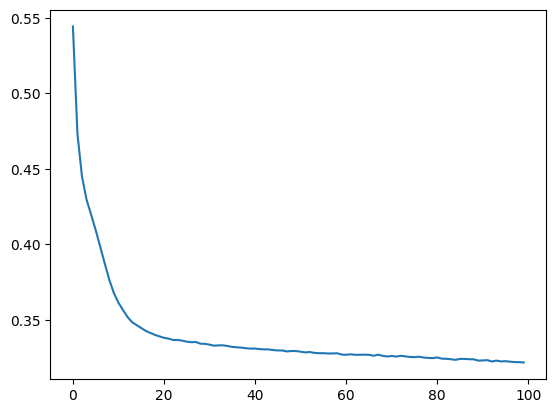

In [43]:
plt.plot(history.history['loss'])

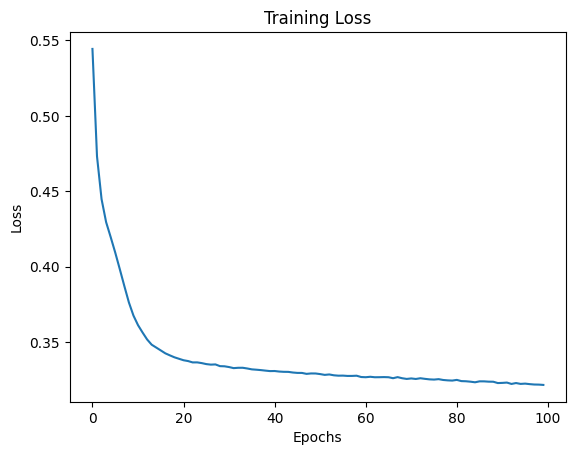

In [44]:
# in a detailed way
plt.plot(history.history['loss'])
plt.xlabel("Epochs")        # x-axis label
plt.ylabel("Loss")          # y-axis label
plt.title("Training Loss")  
plt.show()

**from the graph loss is decreasing as epochs incresing , first suddenly decreased then decreased gradually**


Text(0, 0.5, 'Loss')

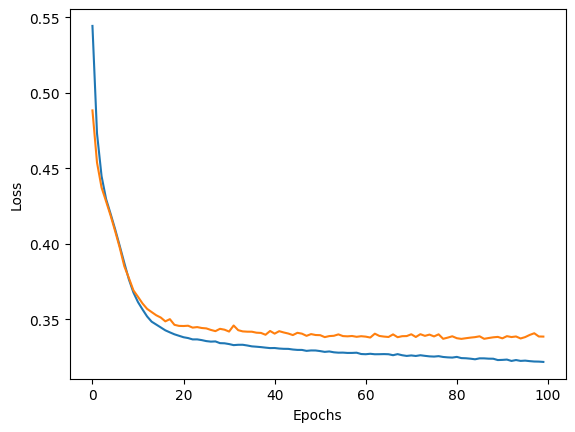

In [47]:
# graph between training losss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

**the gap between teo curves defines how much the model is overfitted**

Text(0, 0.5, 'Accuracy')

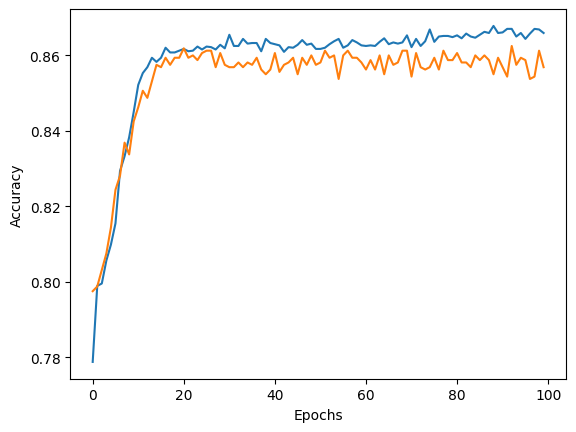

In [48]:
# graph between training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')